In [29]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


# Load data
data = yf.download("AAPL", start="2015-01-01", end="2025-04-15")



[*********************100%***********************]  1 of 1 completed


In [31]:
data.tail(10)

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-01,222.897705,223.387054,218.613315,219.522127,36412700
2025-04-02,223.596786,224.895087,220.730550,221.030160,35905900
2025-04-03,202.923904,207.218276,200.986443,205.270818,103419000
2025-04-04,188.133301,199.618240,187.094654,193.636079,125910900
2025-04-07,181.222366,193.895735,174.391312,176.967935,160466300
2025-04-08,172.194199,190.090729,168.988411,186.455496,120859500
2025-04-09,198.589584,200.347274,171.664886,171.724805,184395900
2025-04-10,190.170624,194.524915,182.760343,188.822401,121880000


In [72]:
# Parameters
window_size = 90

In [74]:
# Normalize data
prices = prices.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

In [76]:
#Create Seauences
X = []
y = []

for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i - window_size:i])
    y.append(scaled_prices[i])

X = np.array(X)
y = np.array(y)

In [78]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [114]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100


C:\Users\assma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0241
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9676e-04
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.9887e-04
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.7859e-04
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4717e-04
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8721e-04
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6409e-04
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2447e-04
Epoch 9/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1747e-04
Epoch 10/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.4152e-04
Epoch 11/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3466e-04
Epoch 12/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1353e-04
Epoch 13/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.1018e-04
Epoch 14/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8109e-05
Epoch 15/100
61/61 ━━━━━━━━━━━━

In [116]:
predicted = model.predict(X_test)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


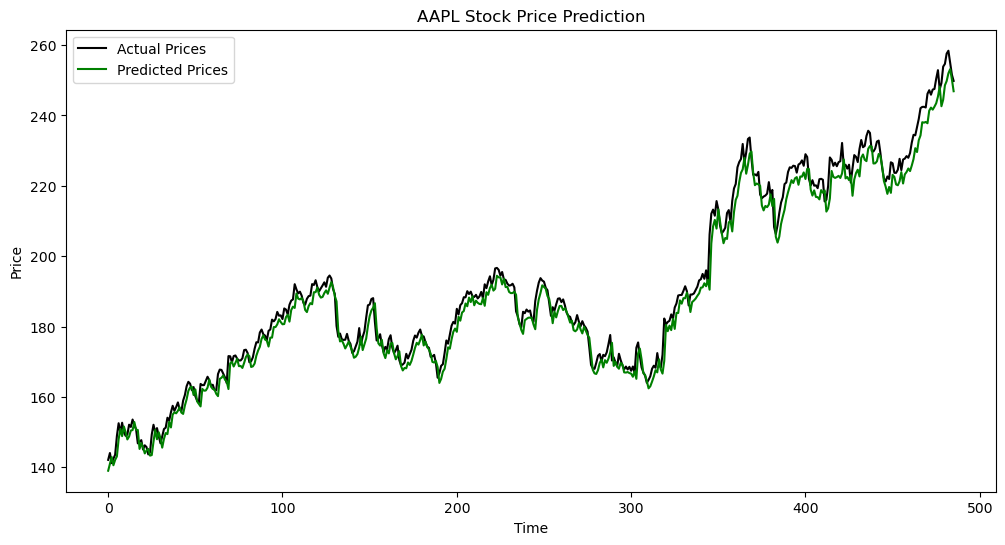

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='black', label='Actual Prices')
plt.plot(predicted_prices, color='green', label='Predicted Prices')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate
mse = mean_squared_error(real_prices, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 13.7695
Root Mean Squared Error (RMSE): 3.7107
Mean Absolute Error (MAE): 2.9612
R-squared (R²): 0.9806
